In [1]:
import supervenn, pandas, matplotlib_venn

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'font.family':'sans-serif', 
                            'xtick.labelsize':16, 
                            'ytick.labelsize':16, 
                            'figure.figsize':(16*(2/3), 9*(2/3)), 
                            'axes.labelsize':20
                           })

# super venn

In [3]:
input_dir = '/Users/adrian/research/keflavik/results/deseq2/log2fc_pointsix/'

df = pandas.read_csv(input_dir+'effect_SETDB2_OE_M104.tsv', sep='\t', index_col=0)
a = set(df.index)
print(len(a))

df = pandas.read_csv(input_dir+'effect_miRNA1_M501.tsv', sep='\t', index_col=0)
b1 = set(df.index)
print(len(b1))

df = pandas.read_csv(input_dir+'effect_miRNA2_M501.tsv', sep='\t', index_col=0)
b2 = set(df.index)
print(len(b2))

df = pandas.read_csv(input_dir+'effect_miRNA1_Sk28.tsv', sep='\t', index_col=0)
c1 = set(df.index)
print(len(c1))

df = pandas.read_csv(input_dir+'effect_miRNA2_Sk28.tsv', sep='\t', index_col=0)
c2 = set(df.index)
print(len(c2))

861
206
94
69
100


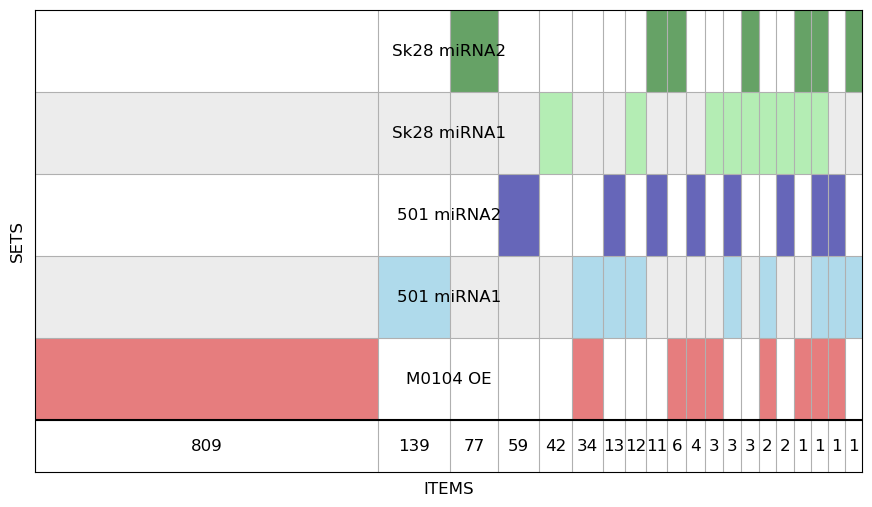

In [4]:
sets = [a, b1, b2, c1, c2]
labels = ['M0104 OE', '501 miRNA1', '501 miRNA2', 'Sk28 miRNA1', 'Sk28 miRNA2']
mso = supervenn.supervenn(sets, labels,
                          side_plots=False, chunks_ordering='size', widths_minmax_ratio=0.05,
                          reverse_sets_order=False, fontsize=12, color_cycle=['tab:red', 'skyblue', 'darkblue', 'lightgreen', 'darkgreen'])

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('supervenn.svg')

In [5]:
# take out those 34, which I would follow up with
consider = list(mso.chunks[frozenset([0, 1])])
print(len(consider))
for element in consider:
    print(element)

34
ENSG00000255346
ENSG00000243244
ENSG00000229109
ENSG00000101265
ENSG00000041982
ENSG00000047644
ENSG00000183054
ENSG00000196935
ENSG00000106772
ENSG00000164434
ENSG00000104332
ENSG00000105255
ENSG00000185985
ENSG00000007062
ENSG00000231811
ENSG00000166501
ENSG00000170271
ENSG00000182752
ENSG00000181649
ENSG00000135074
ENSG00000198729
ENSG00000085563
ENSG00000131409
ENSG00000140522
ENSG00000213096
ENSG00000154016
ENSG00000239508
ENSG00000182463
ENSG00000143344
ENSG00000085831
ENSG00000117245
ENSG00000175445
ENSG00000113369
ENSG00000205542


In [15]:
annotation_file = '/Users/adrian/research/keflavik/results/deseq2/annotation.tsv'
annotation = pandas.read_csv(annotation_file, sep='\t')
annotation

,Unnamed: 0,ensembl_transcript_id,ensembl_gene_id,external_gene_name,gene_biotype,description
0,1,ENST00000387314,ENSG00000210049,MT-TF,Mt_tRNA,mitochondrially encoded tRNA-Phe (UUU/C) [Sour...
1,2,ENST00000389680,ENSG00000211459,MT-RNR1,Mt_rRNA,mitochondrially encoded 12S rRNA [Source:HGNC ...
2,3,ENST00000387342,ENSG00000210077,MT-TV,Mt_tRNA,mitochondrially encoded tRNA-Val (GUN) [Source...
3,4,ENST00000387347,ENSG00000210082,MT-RNR2,Mt_rRNA,mitochondrially encoded 16S rRNA [Source:HGNC ...
4,5,ENST00000386347,ENSG00000209082,MT-TL1,Mt_tRNA,mitochondrially encoded tRNA-Leu (UUA/G) 1 [So...
...,...,...,...,...,...,...
278215,278216,ENST00000441160,ENSG00000228437,LINC02474,lncRNA,long intergenic non-protein coding RNA 2474 [S...
278216,278217,ENST00000412098,ENSG00000229463,LYST-AS1,lncRNA,LYST antisense RNA 1 [Source:HGNC Symbol;Acc:H...
278217,278218,ENST00000438371,ENSG00000229291,LINC02768,lncRNA,long intergenic non-protein coding RNA 2768 [S...
278218,278219,ENST00000715678,ENSG00000229291,LINC02768,lncRNA,long intergenic non-protein coding RNA 2768 [S...


In [26]:
for ensembl in consider:
    symbol = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['external_gene_name'].values))[0]
    description = list(set(annotation[annotation['ensembl_gene_id'] == ensembl]['description'].values))[0].split(' [')[0]
    print('{}\t{}\t{}'.format(ensembl, symbol, description))

ENSG00000255346	NOX5	NADPH oxidase 5
ENSG00000243244	STON1	stonin 1
ENSG00000229109	FRMD3-AS1	FRMD3 antisense RNA 1
ENSG00000101265	RASSF2	Ras association domain family member 2
ENSG00000041982	TNC	tenascin C
ENSG00000047644	WWC3	WWC family member 3
ENSG00000183054	RGPD6	RANBP2 like and GRIP domain containing 6
ENSG00000196935	SRGAP1	SLIT-ROBO Rho GTPase activating protein 1
ENSG00000106772	PRUNE2	prune homolog 2 with BCH domain
ENSG00000164434	FABP7	fatty acid binding protein 7
ENSG00000104332	SFRP1	secreted frizzled related protein 1
ENSG00000105255	FSD1	fibronectin type III and SPRY domain containing 1
ENSG00000185985	SLITRK2	SLIT and NTRK like family member 2
ENSG00000007062	PROM1	prominin 1
ENSG00000231811	nan	novel transcript
ENSG00000166501	PRKCB	protein kinase C beta
ENSG00000170271	FAXDC2	fatty acid hydroxylase domain containing 2
ENSG00000182752	PAPPA	pappalysin 1
ENSG00000181649	PHLDA2	pleckstrin homology like domain family A member 2
ENSG00000135074	ADAM19	ADAM metallopepti

# individual miRNAs Venn diagrams do venn diagrams individually

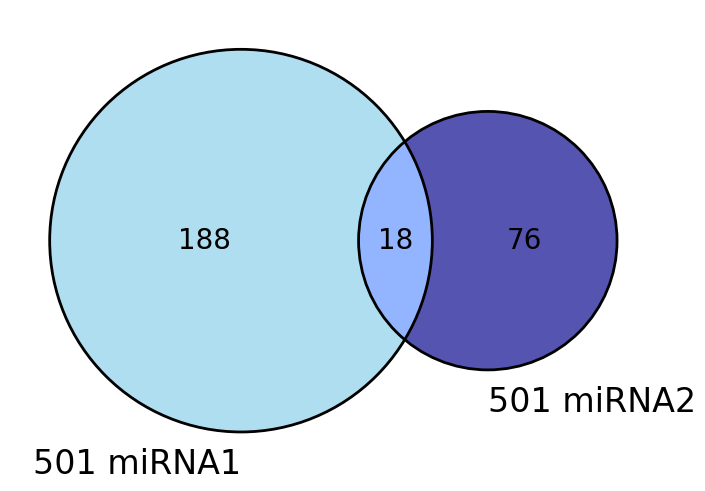

In [7]:
matplotlib_venn.venn2(subsets=(b1, b2),
                      set_labels=('501 miRNA1', '501 miRNA2'), 
                      set_colors=('skyblue', 'darkblue'),
                      alpha=2/3)
matplotlib_venn.venn2_circles(subsets=(b1, b2))  

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('venn_broad.svg')

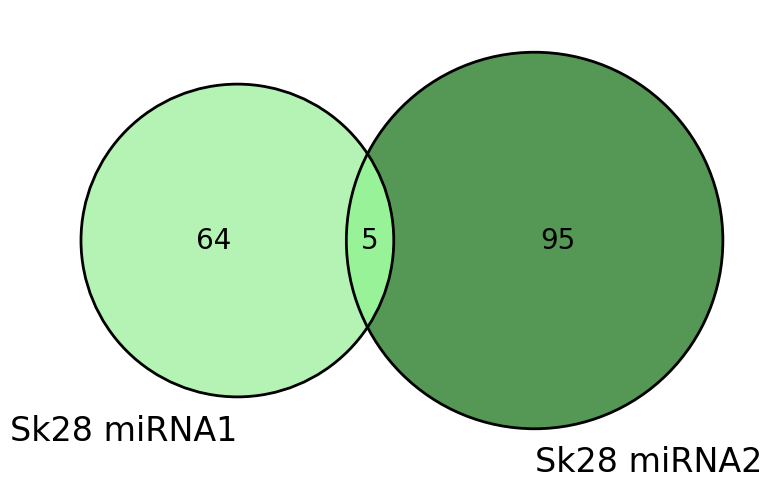

In [8]:
matplotlib_venn.venn2(subsets=(c1, c2),
                      set_labels=('Sk28 miRNA1', 'Sk28 miRNA2'), 
                      set_colors=('lightgreen', 'darkgreen'),
                      alpha=2/3)
matplotlib_venn.venn2_circles(subsets=(c1, c2))  

matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('venn_broad.svg')